In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-75c8cae5-cfd1-3b0f-40cc-dd58483b5233)


In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct


Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
data_dir = 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
line = get_lines(data_dir+'train.txt')

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts
  
  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["line_number"] = abstract_line_number
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list
    
    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line
  
  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",11
6,6,RESULTS,there was a clinically relevant reduction in t...,11
7,7,RESULTS,the mean difference between treatment arms ( @...,11
8,8,RESULTS,"further , there was a clinically relevant redu...",11
9,9,RESULTS,these differences remained significant at @ we...,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

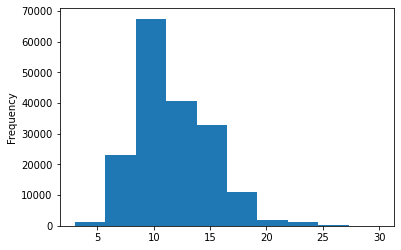

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(sparse=False)
train_labels_oh_encoded = oh_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_oh_encoded = oh_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_oh_encoded = oh_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

Model 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences, 
            y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences, y=val_labels_encoded)

0.7218323844829869

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

In [ ]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=68000, output_sequence_length=55)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
ransen = random.choice(train_sentences)
print(ransen)
print('--------------------')
print(text_vectorizer([ransen]))

peak strain was highest in the rv free wall and lowest in the septum .
--------------------
tf.Tensor(
[[  690  1679    10  1142     5     2  2467   947  1983     3  1999     5
      2 12385     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)


In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
cust_embedding = tf.keras.layers.Embedding(input_dim=len(rct_20k_text_vocab), output_dim=128, mask_zero=True, name="token_embedding")

print(f"Sentence before vectorization:\n{ransen}\n")
vectorized_sentence = text_vectorizer([ransen])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = cust_embedding(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
peak strain was highest in the rv free wall and lowest in the septum .

Sentence after vectorization (before embedding):
[[  690  1679    10  1142     5     2  2467   947  1983     3  1999     5
      2 12385     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.02392984 -0.01119179 -0.04752498 ...  0.000414    0.04304017
   -0.01598348]
  [-0.03094866 -0.02537059 -0.01793908 ... -0.01328908  0.04056287
    0.04262112]
  [ 0.00682812  0.00414276 -0.02974626 ... -0.02091924 -0.04910544
    0.00227861]
  ...
  [-0.00445341  0.02154465 -0.04298915 ... -0.03655063  0.00318941
    0.00085099]
  [-0.00445341  0.02154465 -0.04298915 ... -0.03655063  0.00318941
    0.00085099]
  [-0.00445341  0.02154465 -0.04298915 ... -0.03655063  0.

In [ ]:
train = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_oh_encoded))
valid = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_oh_encoded))
test = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_oh_encoded))

print(valid)
print(train)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>
<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>


In [ ]:
train = train.batch(32).prefetch(tf.data.AUTOTUNE)
valid = valid.batch(32).prefetch(tf.data.AUTOTUNE)
test = test.batch(32).prefetch(tf.data.AUTOTUNE)

print(train)
print(valid)

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>


In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vect = text_vectorizer(inputs)
text_embeds = cust_embedding(text_vect)
x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(text_embeds)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
model_1_history = model_1.fit(train, 
                              steps_per_epoch=int(0.1 * len(train)), # only fit on 10% of batches for faster training time
                              epochs=5,
                              validation_data=valid,
                              validation_steps=int(0.1 * len(valid)))

Epoch 1/5
562/562 [==============================] - 14s 9ms/step - loss: 0.9129 - accuracy: 0.6393 - val_loss: 0.6828 - val_accuracy: 0.7374
Epoch 2/5
562/562 [==============================] - 5s 8ms/step - loss: 0.6575 - accuracy: 0.7561 - val_loss: 0.6333 - val_accuracy: 0.7706
Epoch 3/5
562/562 [==============================] - 5s 8ms/step - loss: 0.6190 - accuracy: 0.7719 - val_loss: 0.5989 - val_accuracy: 0.7839
Epoch 4/5
562/562 [==============================] - 5s 8ms/step - loss: 0.5913 - accuracy: 0.7857 - val_loss: 0.5813 - val_accuracy: 0.7856
Epoch 5/5
562/562 [==============================] - 5s 8ms/step - loss: 0.5937 - accuracy: 0.7920 - val_loss: 0.5646 - val_accuracy: 0.7919


Model 2 Pre

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
random_sen = random.choice(train_sentences)
print("Random:", random_sen)
use_embedded_sentence = tf_hub_embedding_layer([random_sen])
print("Embedded:", use_embedded_sentence)

Random: unique identifier : actrn@ .
Embedded: tf.Tensor(
[[-0.03615514 -0.0389166  -0.07616191  0.04987787  0.06386736  0.04709401
  -0.05382137  0.02700108  0.01696251  0.01479829  0.04099126 -0.01065705
   0.02424682  0.03208951 -0.00415298  0.05147427  0.03343368 -0.06800051
   0.02791684 -0.03603175 -0.06877244  0.05409708 -0.0008023   0.04104339
  -0.03892989  0.02705772 -0.0203084   0.02325065  0.08504548  0.00257926
   0.06771179 -0.03125552 -0.00588768  0.03701375 -0.03418782  0.04261858
  -0.07325924  0.02246653 -0.0398496  -0.08438351 -0.05506907 -0.01883058
   0.06222058 -0.05712556 -0.01502369 -0.00652541 -0.04586226 -0.07456279
  -0.00957097 -0.02262275 -0.00590971  0.07991472 -0.06341613 -0.00960966
  -0.04700842 -0.02485476  0.01377492  0.02220728  0.05540143  0.00347042
  -0.06102071 -0.0182141  -0.03056544 -0.05139888 -0.07513305 -0.00232809
   0.02533997  0.01937166 -0.01006298  0.00951154 -0.04518506 -0.01854992
   0.00520144  0.06637052 -0.0252232   0.03801997 -0.0

In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
#text_vect = text_vectorizer(inputs)
embedded = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation='relu')(embedded)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 256,872,069
Trainable params: 74,245
Non-trainable params: 256,797,824
________________________________________

In [ ]:
model_2.fit(train,
            steps_per_epoch=int(0.1*len(train)),
            epochs=5,
            validation_data=valid,
            validation_steps=int(0.1*len(valid)))

Epoch 1/5
562/562 [==============================] - 10s 13ms/step - loss: 0.8927 - accuracy: 0.6494 - val_loss: 0.7858 - val_accuracy: 0.6945
Epoch 2/5
562/562 [==============================] - 7s 12ms/step - loss: 0.7389 - accuracy: 0.7115 - val_loss: 0.7149 - val_accuracy: 0.7197
Epoch 3/5
562/562 [==============================] - 7s 12ms/step - loss: 0.7100 - accuracy: 0.7258 - val_loss: 0.6864 - val_accuracy: 0.7350
Epoch 4/5
562/562 [==============================] - 7s 12ms/step - loss: 0.6789 - accuracy: 0.7411 - val_loss: 0.6634 - val_accuracy: 0.7477
Epoch 5/5
562/562 [==============================] - 7s 12ms/step - loss: 0.6841 - accuracy: 0.7345 - val_loss: 0.6502 - val_accuracy: 0.7503


Model 3

In [ ]:
def split_chars(text):
  return " ".join(list(text))

train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars   = [split_chars(sentence) for sentence in val_sentences]
test_chars  = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

In [ ]:
max_char = np.percentile(char_lens, 95)

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=72, 
                                                    output_sequence_length=290,
                                                    standardize="lower_and_strip_punctuation",
                                                    name="char_vectorizer")

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
cust_embedding = tf.keras.layers.Embedding(input_dim=72,
                                           output_dim=25,
                                           mask_zero=False,
                                           name="char_embedding")


In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
vect = text_vectorizer(inputs)
embeds = cust_embedding(vect)
x = layers.Conv1D(128, kernel_size=5, padding='same', activation='relu')(embeds)
#x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_3 = tf.keras.Model(inputs, outputs)

In [ ]:
model_3.compile(loss="categorical_crossentropy",
                metrics="accuracy",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embedding (Embedding)  (None, 290, 25)           1800      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 128)          16128     
                                                                 
 conv1d_2 (Conv1D)           (None, 290, 64)           41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                            

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_oh_encoded)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_oh_encoded)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
model_3.fit(train_char_dataset,
            steps_per_epoch=int(0.2 * len(train_char_dataset)),
            epochs=5,
            validation_data=val_char_dataset,
            validation_steps=int(0.2 * len(val_char_dataset)))

Epoch 1/5
1125/1125 [==============================] - 8s 6ms/step - loss: 1.3601 - accuracy: 0.4290 - val_loss: 1.2970 - val_accuracy: 0.4678
Epoch 2/5
1125/1125 [==============================] - 7s 6ms/step - loss: 1.2768 - accuracy: 0.4761 - val_loss: 1.2523 - val_accuracy: 0.4851
Epoch 3/5
1125/1125 [==============================] - 6s 6ms/step - loss: 1.2414 - accuracy: 0.4863 - val_loss: 1.2175 - val_accuracy: 0.5041
Epoch 4/5
1125/1125 [==============================] - 6s 6ms/step - loss: 1.2169 - accuracy: 0.4971 - val_loss: 1.2108 - val_accuracy: 0.5086
Epoch 5/5
1125/1125 [==============================] - 7s 6ms/step - loss: 1.2135 - accuracy: 0.5028 - val_loss: 1.2083 - val_accuracy: 0.5046


Model 4